In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm

In [2]:
def load_patterns(filename, out_name):
    columns = ['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
        'Amount Received', 'Receiving Currency', 'Amount Paid',
        'Payment Currency', 'Payment Format', 'Is Laundering', 'Laundering Type']

    patterns = []
    with open(filename, 'r') as file:
        total_lines = sum(1 for _ in file)
        # Read each line in the file
    with open(filename, 'r') as file:
        with tqdm(total=total_lines, desc="Processing lines", unit="line") as pbar:
            for line in file:
                # Print each line
                line = line.strip()
                try: #Need try statement because there are empty lines 
                    if line[0]=='B':
                        pbar.update(1)
                        line = line.split('-',1)
                        laund_type = line[1].split(':')[0].strip()
                        num_lines = 0
                        while True:
                            line = file.readline()
                            pbar.update(1) 
                            if line[0]== 'E': # If the line is ended then don't do the rest
                                break
                            line = line.strip().split(',')
                            line.append(laund_type)
                            patterns.append(line)
                            num_lines += 1
                            if num_lines > 100:
                                print('infinity loop??', num_lines, line)
                        # break
                except:
                    pbar.update(1)
                    continue
            #break
    patterns = pd.DataFrame(patterns, columns=columns)
    patterns.to_csv(out_name, index=False)
    return 


In [3]:
load_patterns('patterns/HI-Medium_patterns.txt','patterns/HI-Medium_patterns.csv')
load_patterns('patterns/LI-Medium_patterns.txt','patterns/LI-Medium_patterns.csv')
load_patterns('patterns/HI-Small_patterns.txt','patterns/HI-Small_patterns.csv')
load_patterns('patterns/LI-Small_patterns.txt','patterns/LI-Small_patterns.csv')

Processing lines: 100%|██████████| 1374/1374 [00:00<00:00, 274505.75line/s]


In [3]:
#load_patterns('patterns/HI-Large_patterns.txt','patterns/HI-Large_patterns.csv')

In [2]:
alldata_HI = pd.read_csv('HI_alldata_authorities.csv')
alldata_LI = pd.read_csv('LI_alldata_authorities.csv')
alldata_GCN_HI = pd.read_csv('HI_alldata_authorities_GCN.csv')
alldata_GCN_LI = pd.read_csv('LI_alldata_authorities_GCN.csv')
alldata_HI2 = pd.read_csv('HI_alldata_authorities2.csv')

In [2]:
alldata_HI = pd.read_csv('HI_alldata_authorities_testdata.csv')
alldata_LI = pd.read_csv('LI_alldata_authorities_testdata.csv')
alldata_GCN_HI = pd.read_csv('HI_alldata_authorities_testdata_GCN.csv')
alldata_GCN_LI = pd.read_csv('LI_alldata_authorities_testdata_GCN.csv')

In [3]:
patterns_HI = pd.read_csv('patterns/HI-Large_patterns.csv')
patterns_LI  = pd.read_csv('patterns/LI-Large_patterns.csv')

In [6]:
alldata_HI['Payment Format_x'].unique()

array(['ACH', 'Bitcoin', 'Credit Card', 'Cash', 'Cheque', 'Wire',
       'Reinvestment'], dtype=object)

In [11]:
alldata_HI.head(10)

,Timestamp_x,From Bank,Account,To Bank,Account.1,Amount Received_x,Receiving Currency,Amount Paid,Payment Currency,Payment Format_x,...,Received Currency,Payment Format_y,Is Laundering_y,Edge_ID,Prediction,True_Label,Time_stamp,Timestamp_new,predicted_label,Prediction_prob
0,2022/08/01 00:07,0,8009B22F0,0,8009B22F0,121.98,US Dollar,121.98,US Dollar,Reinvestment,...,0,0,0,0.0,0,0,NaN,NaN,0.5,6.157365e-32
1,2022/08/01 00:22,0,800815DE0,0,800815DE0,23.40,US Dollar,23.40,US Dollar,Reinvestment,...,0,0,0,1.0,0,0,NaN,NaN,0.5,0.000000e+00
2,2022/08/01 00:17,0,800A39060,0,800A39060,34776847.10,US Dollar,34776847.10,US Dollar,Reinvestment,...,0,0,0,2.0,0,0,NaN,NaN,0.5,1.901325e-31
3,2022/08/01 00:14,0,800A39060,2310,800A39B80,4332.00,US Dollar,4332.00,US Dollar,Cheque,...,0,1,0,3.0,0,0,NaN,NaN,0.5,0.000000e+00
4,2022/08/01 00:04,31620,800BA9350,0,800ABF260,0.01,US Dollar,0.01,US Dollar,Cheque,...,0,1,0,4.0,0,0,NaN,NaN,0.5,1.732778e-28
5,2022/08/01 00:06,0,800ABF260,0,800ABF260,7.29,US Dollar,7.29,US Dollar,Reinvestment,...,0,0,0,5.0,0,0,NaN,NaN,0.5,8.347611e-29
6,2022/08/01 00:04,1601,800BAB2F0,0,800CC3480,511637.03,US Dollar,511637.03,US Dollar,Cheque,...,0,1,0,6.0,0,0,NaN,NaN,0.5,6.359006e-31
7,2022/08/01 00:16,0,800EC5EB0,0,800EC5EB0,12995.31,US Dollar,12995.31,US Dollar,Reinvestment,...,0,0,0,7.0,0,0,NaN,NaN,0.5,2.246737e-30
8,2022/08/01 00:23,0,800CC3480,86993,82208C8C0,43.99,US Dollar,43.99,US Dollar,Credit Card,...,0,2,0,8.0,0,0,NaN,NaN,0.5,1.026568e-32
9,2022/08/01 00:26,0,800CCE690,235792,81B2A80E0,27.56,US Dollar,27.56,US Dollar,Credit Card,...,0,2,0,9.0,0,0,NaN,NaN,0.5,2.434884e-32


In [ ]:
authorities_FF[authorities_FF['Is Laundering_x']!=authorities_FF['True_Label']]

In [ ]:
alldata_HI[alldata_HI['Payment Format_x']!=alldata_HI['Payment Format_y']][['Payment Format_x','Payment Format_y']]

In [ ]:
#alldata_HI = alldata_HI.drop_duplicates('Edge_ID')
# Find rows where the selected columns differ between the two subsets
mismatched_rows = pd.DataFrame()
for col1, col2 in zip(
    ['Is Laundering_y'], 
    ['True_Label']
):
    # Filter rows where the two columns differ
    mask = alldata_HI[col1] != alldata_HI[col2]
    
    # Extract the rows where the mismatch occurs
    mismatched_rows = pd.concat([mismatched_rows, alldata_HI[mask]], ignore_index=True)

# Remove duplicate rows from the mismatched_rows DataFrame (if needed)
mismatched_rows = mismatched_rows.drop_duplicates()
#mismatched_rows

In [ ]:
alldata_HI.columns

In [4]:
def confusion_matrix_plot(data, bank, title,saveas, is_bank =True):
  
  if is_bank:
    bank_data = data[(data['From Bank']==bank) | (data['To Bank']==bank)]
  else: 
    bank_data = data

  bank_data = bank_data.drop_duplicates(subset = ['EdgeID'])
  threshold = 0.5
  y_pred_prob = list(bank_data['predicted_label'])
 
  bank_data['predicted_binary'] =  bank_data['Prediction']#[1 if prob >= threshold else 0 for prob in y_pred_prob]
#  return bank_data

  true_labels = bank_data['True_Label']
  predicted_labels= bank_data['predicted_binary']


  conf_matrix = confusion_matrix(true_labels, predicted_labels)
  class_labels = ['Not-Fraud', 'Fraud']

  total = conf_matrix.sum()
  annot = np.empty_like(conf_matrix).astype(str)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          count = conf_matrix[i, j]
          percentage = count / total * 100
          annot[i, j] = f'{count:,}\n({percentage:.1f}%)'

  # Create a heatmap using seaborn
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=annot, fmt='', cmap='PuRd', xticklabels=class_labels, yticklabels=class_labels)

  # Add labels, title, and display the plot
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'{title}')
  plt.savefig(f'{saveas}.png')
  plt.show()
  # Calculate precision, recall, and F1-score
  precision = precision_score(true_labels, predicted_labels, average='binary')
  recall = recall_score(true_labels, predicted_labels, average='binary')
  f1 = f1_score(true_labels, predicted_labels, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1-Score: {f1:.2f}")

  # Alternatively, print a full classification report
  print("\nClassification Report:")
  print(classification_report(true_labels, predicted_labels, target_names=class_labels, digits=4))

In [5]:
def patterns_transactions(data,patterns, bank,is_bank =True):
  
    if is_bank:
        data = data[(data['From Bank']==bank) | (data['To Bank']==bank)]
    data = data.drop_duplicates(subset = ['EdgeID'])
    
    # Select only the relevant columns from patterns_HI
  #  patterns_reduced = patterns#[['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Laundering Type','Is Laundering']]

    # Merge the DataFrames
    merged_df = data.merge(
        patterns,  #
        how='left',  # Use 'left' to keep all rows from the first DataFrame
        left_on=['Timestamp_x','From Bank','To Bank', 'Account','Account.1','Amount Paid','Amount Received_x'],#[ 'From Bank', 'Account', 'To Bank', 'Account.1','Is Laundering_x'],  # Keys for the first DataFrame
        right_on=['Timestamp','From Bank','To Bank','Account','Account.1','Amount Paid','Amount Received'],#[ 'From Bank', 'Account', 'To Bank', 'Account.1','Is Laundering']  # Keys for the second DataFrame
    )

    threshold = 0.5
    patterns = merged_df.drop(columns=['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Is Laundering'])

    y_pred_prob = list(patterns['predicted_label'])

 
    patterns['predicted_binary'] =  patterns['Prediction']# [1 if prob >= threshold else 0 for prob in y_pred_prob]

    patterns = patterns[patterns['Laundering Type'].notna()]
    patterns = patterns[['True_Label','predicted_binary','Laundering Type']]

    patterns_before = patterns

    patterns['Correct'] = [1 if row['True_Label']==row['predicted_binary'] else 0 for i,row in patterns.iterrows()]
    patterns['False'] = [1 if row['True_Label']!=row['predicted_binary'] else 0 for i,row in patterns.iterrows()]

    patterns = patterns.groupby('Laundering Type')[['Correct', 'False']].sum()
    patterns['Correct_percent'] = patterns['Correct']/(patterns['Correct']+patterns['False'])
    patterns['False_percent'] = 1-patterns['Correct_percent']
   # f, ax = plt.subplots(figsize=(6, 6))
   # sns.heatmap(patterns,annot=True, ax=ax)
    
    return patterns#, patterns_before

In [ ]:
out = patterns_transactions(alldata_HI, patterns_HI,bank=0, is_bank=True)
out

In [17]:
merged,patterns = patterns_transactions(alldata_LI, patterns_LI,bank=0, is_bank=True)

In [19]:
patterns#[patterns['True_Label']!=1]

,True_Label,predicted_binary,Laundering Type,Correct,False
0,1,1,GATHER-SCATTER,1,0
1,1,0,FAN-OUT,0,1
2,1,0,GATHER-SCATTER,0,1
3,1,1,SCATTER-GATHER,1,0
5,1,1,SCATTER-GATHER,1,0
...,...,...,...,...,...
74370,1,1,STACK,1,0
74378,1,0,STACK,0,1
74379,1,0,FAN-OUT,0,1
74380,1,0,FAN-OUT,0,1


In [ ]:
patterns_HI.columns

In [ ]:
patterns_HI.dtypes

In [24]:
pattern.columns

Index(['Correct', 'False'], dtype='object')

In [14]:


# for bank in [0,11,12,20,27,70]:
#     confusion_matrix_plot(alldata_HI, bank=bank,title=f'Bank {bank} HI-data FraudGT')
    
    
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct', 'bank','Count'])
for bank in [0,11,12,20,27,70]:
    print(f'bank {bank}')
    pattern = patterns_transactions(alldata_HI, patterns_HI,bank=bank, is_bank=True)
    pattern['bank'] = f'bank_{bank}'
    pattern = pattern.reset_index()
    pattern['Correct_percent']=round(pattern['Correct_percent']*100, 1)
    pattern['Count'] =  (
        pattern['Correct'].astype(int).astype(str) + "/" +
        (pattern['Correct'] + pattern['False']).astype(int).astype(str)
    )
    pattern = pattern[['Laundering Type', 'Correct_percent', 'bank', 'Count']]
    correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)
    print(pattern)
    
  #  print(round(pattern['Correct']*100, 2))

correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)
# Pivot the table so that each bank becomes a column
combined_table = correct_patterns.pivot(
    index="Laundering Type", 
    columns="bank", 
    values="Combined"
)
data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="bank", values="Combined")
data_pivoted

bank 0
  Laundering Type  Correct_percent    bank    Count
0       BIPARTITE             80.3  bank_0    61/76
1           CYCLE             85.9  bank_0    79/92
2          FAN-IN             45.8  bank_0   54/118
3         FAN-OUT             92.5  bank_0  123/133
4  GATHER-SCATTER             82.8  bank_0  197/238
5          RANDOM             75.5  bank_0    37/49
6  SCATTER-GATHER             72.8  bank_0  110/151
7           STACK             83.0  bank_0  146/176
bank 11
  Laundering Type  Correct_percent     bank    Count
0       BIPARTITE             83.8  bank_11    67/80
1           CYCLE             84.5  bank_11    49/58
2          FAN-IN             83.3  bank_11    45/54
3         FAN-OUT             90.4  bank_11    66/73
4  GATHER-SCATTER             91.8  bank_11  213/232
5          RANDOM             93.4  bank_11    71/76
6  SCATTER-GATHER             82.1  bank_11  138/168
7           STACK             88.0  bank_11  147/167
bank 12
  Laundering Type  Correct_perce

bank,bank_0,bank_11,bank_12,bank_20,bank_27
Laundering Type,,,,,
BIPARTITE,80.3% (61/76),83.8% (67/80),88.1% (59/67),83.6% (61/73),77.8% (21/27)
CYCLE,85.9% (79/92),84.5% (49/58),75.7% (53/70),90.0% (63/70),95.7% (22/23)
FAN-IN,45.8% (54/118),83.3% (45/54),62.3% (38/61),62.9% (39/62),90.0% (27/30)
FAN-OUT,92.5% (123/133),90.4% (66/73),86.4% (57/66),91.3% (42/46),89.3% (25/28)
GATHER-SCATTER,82.8% (197/238),91.8% (213/232),85.9% (274/319),81.7% (267/327),86.3% (63/73)
RANDOM,75.5% (37/49),93.4% (71/76),80.9% (38/47),79.4% (54/68),80.0% (20/25)
SCATTER-GATHER,72.8% (110/151),82.1% (138/168),87.1% (81/93),79.8% (130/163),83.1% (54/65)
STACK,83.0% (146/176),88.0% (147/167),82.7% (115/139),86.0% (166/193),75.4% (43/57)


In [7]:
   
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct', 'bank'])
for bank in [0,11,12,20,27,70]:
    print(f'bank {bank}')
    pattern = patterns_transactions(alldata_LI, patterns_LI,bank=bank, is_bank=True)
    pattern['bank'] = f'bank_{bank}'
    pattern = pattern.reset_index()
    pattern['Correct_percent']=round(pattern['Correct_percent']*100, 1)
    pattern['Count'] =  (
        pattern['Correct'].astype(int).astype(str) + "/" +
        (pattern['Correct'] + pattern['False']).astype(int).astype(str)
    )
    pattern = pattern[['Laundering Type', 'Correct_percent', 'bank', 'Count']]
    correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)
    
  #  print(round(pattern['Correct']*100, 2))

correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)
# Pivot the table so that each bank becomes a column
combined_table = correct_patterns.pivot(
    index="Laundering Type", 
    columns="bank", 
    values="Combined"
)
data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="bank", values="Combined")
data_pivoted

bank 0
bank 11
bank 12
bank 20
bank 27
bank 70


bank,bank_0,bank_11,bank_12,bank_20,bank_27
Laundering Type,,,,,
BIPARTITE,42.9% (3/7),50.0% (6/12),88.9% (8/9),75.0% (6/8),0.0% (0/1)
CYCLE,57.1% (8/14),33.3% (1/3),50.0% (6/12),46.2% (6/13),100.0% (3/3)
FAN-IN,10.5% (2/19),50.0% (4/8),40.0% (2/5),18.8% (3/16),NaN
FAN-OUT,66.7% (16/24),83.3% (10/12),75.0% (3/4),60.0% (6/10),100.0% (1/1)
GATHER-SCATTER,28.6% (2/7),68.6% (24/35),35.3% (6/17),44.0% (11/25),50.0% (2/4)
RANDOM,75.0% (6/8),60.0% (6/10),80.0% (8/10),36.4% (4/11),0.0% (0/1)
SCATTER-GATHER,25.0% (4/16),56.2% (9/16),50.0% (6/12),68.4% (13/19),0.0% (0/1)
STACK,27.3% (6/22),62.5% (10/16),52.2% (12/23),50.0% (8/16),77.8% (7/9)


In [8]:
   
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct', 'bank'])
for bank in [0,11,12,20,27,70]:
    print(f'bank {bank}')
    pattern = patterns_transactions(alldata_GCN_HI, patterns_HI,bank=bank, is_bank=True)
    pattern['bank'] = f'bank_{bank}'
    pattern = pattern.reset_index()
    pattern['Correct_percent']=round(pattern['Correct_percent']*100, 1)
    pattern['Count'] =  (
        pattern['Correct'].astype(int).astype(str) + "/" +
        (pattern['Correct'] + pattern['False']).astype(int).astype(str)
    )
    pattern = pattern[['Laundering Type', 'Correct_percent', 'bank', 'Count']]
    correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)
    
  #  print(round(pattern['Correct']*100, 2))

correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)
# Pivot the table so that each bank becomes a column
combined_table = correct_patterns.pivot(
    index="Laundering Type", 
    columns="bank", 
    values="Combined"
)
data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="bank", values="Combined")
data_pivoted

bank 0
bank 11
bank 12
bank 20
bank 27
bank 70


bank,bank_0,bank_11,bank_12,bank_20,bank_27
Laundering Type,,,,,
BIPARTITE,85.5% (65/76),75.0% (60/80),80.6% (54/67),67.1% (49/73),55.6% (15/27)
CYCLE,85.9% (79/92),77.6% (45/58),77.1% (54/70),80.0% (56/70),91.3% (21/23)
FAN-IN,60.2% (71/118),72.2% (39/54),59.0% (36/61),75.8% (47/62),80.0% (24/30)
FAN-OUT,91.7% (122/133),84.9% (62/73),71.2% (47/66),82.6% (38/46),78.6% (22/28)
GATHER-SCATTER,86.1% (205/238),75.9% (176/232),79.0% (252/319),73.4% (240/327),83.6% (61/73)
RANDOM,79.6% (39/49),78.9% (60/76),78.7% (37/47),70.6% (48/68),72.0% (18/25)
SCATTER-GATHER,78.1% (118/151),66.7% (112/168),83.9% (78/93),79.1% (129/163),84.6% (55/65)
STACK,81.2% (143/176),77.2% (129/167),77.0% (107/139),78.2% (151/193),61.4% (35/57)


In [9]:
   
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct', 'bank'])
for bank in [0,11,12,20,27,70]:
    print(f'bank {bank}')
    pattern = patterns_transactions(alldata_GCN_LI, patterns_LI,bank=bank, is_bank=True)
    pattern['bank'] = f'bank_{bank}'
    pattern = pattern.reset_index()
    pattern['Correct_percent']=round(pattern['Correct_percent']*100, 1)
    pattern['Count'] =  (
        pattern['Correct'].astype(int).astype(str) + "/" +
        (pattern['Correct'] + pattern['False']).astype(int).astype(str)
    )
    pattern = pattern[['Laundering Type', 'Correct_percent', 'bank', 'Count']]
    correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)
    
  #  print(round(pattern['Correct']*100, 2))

correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)
# Pivot the table so that each bank becomes a column
combined_table = correct_patterns.pivot(
    index="Laundering Type", 
    columns="bank", 
    values="Combined"
)
data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="bank", values="Combined")
data_pivoted

bank 0
bank 11
bank 12
bank 20
bank 27
bank 70


bank,bank_0,bank_11,bank_12,bank_20,bank_27
Laundering Type,,,,,
BIPARTITE,28.6% (2/7),25.0% (3/12),55.6% (5/9),50.0% (4/8),0.0% (0/1)
CYCLE,50.0% (7/14),33.3% (1/3),41.7% (5/12),61.5% (8/13),66.7% (2/3)
FAN-IN,21.1% (4/19),37.5% (3/8),40.0% (2/5),12.5% (2/16),NaN
FAN-OUT,83.3% (20/24),75.0% (9/12),50.0% (2/4),60.0% (6/10),100.0% (1/1)
GATHER-SCATTER,57.1% (4/7),65.7% (23/35),11.8% (2/17),36.0% (9/25),25.0% (1/4)
RANDOM,75.0% (6/8),50.0% (5/10),50.0% (5/10),36.4% (4/11),0.0% (0/1)
SCATTER-GATHER,43.8% (7/16),50.0% (8/16),16.7% (2/12),68.4% (13/19),0.0% (0/1)
STACK,36.4% (8/22),56.2% (9/16),47.8% (11/23),25.0% (4/16),22.2% (2/9)


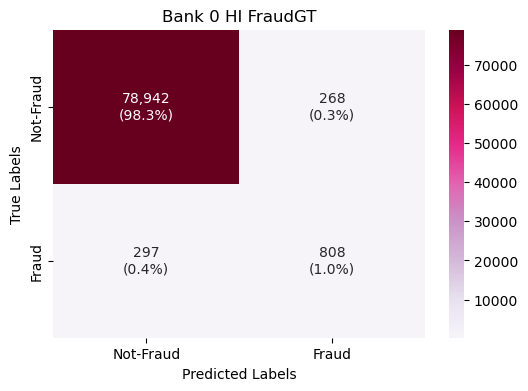

Precision: 0.75
Recall: 0.73
F1-Score: 0.74

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9963    0.9966    0.9964     79210
       Fraud     0.7509    0.7312    0.7409      1105

    accuracy                         0.9930     80315
   macro avg     0.8736    0.8639    0.8687     80315
weighted avg     0.9929    0.9930    0.9929     80315



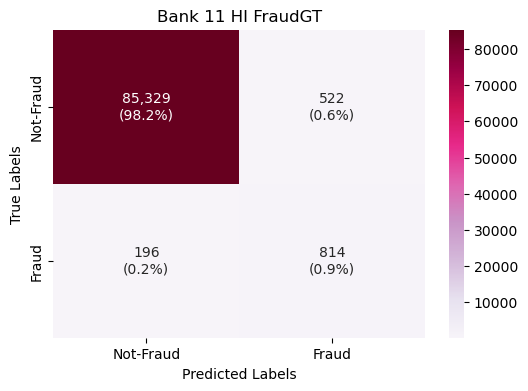

Precision: 0.61
Recall: 0.81
F1-Score: 0.69

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9977    0.9939    0.9958     85851
       Fraud     0.6093    0.8059    0.6939      1010

    accuracy                         0.9917     86861
   macro avg     0.8035    0.8999    0.8449     86861
weighted avg     0.9932    0.9917    0.9923     86861



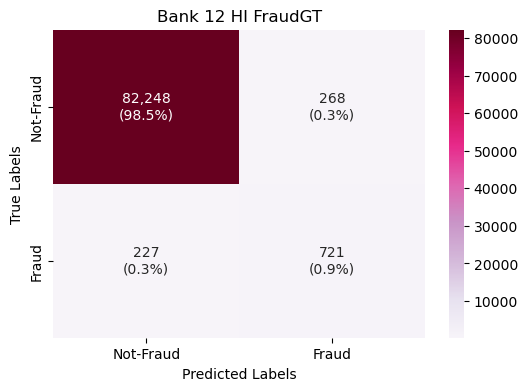

Precision: 0.73
Recall: 0.76
F1-Score: 0.74

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9972    0.9968    0.9970     82516
       Fraud     0.7290    0.7605    0.7445       948

    accuracy                         0.9941     83464
   macro avg     0.8631    0.8787    0.8707     83464
weighted avg     0.9942    0.9941    0.9941     83464



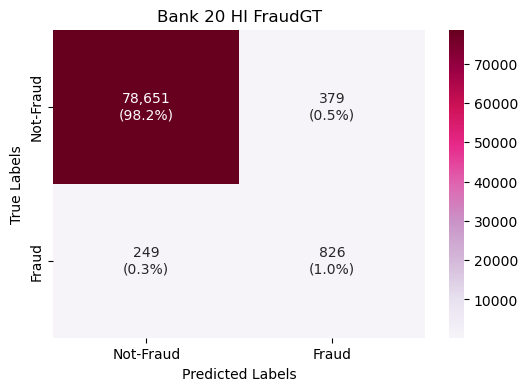

Precision: 0.69
Recall: 0.77
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9968    0.9952    0.9960     79030
       Fraud     0.6855    0.7684    0.7246      1075

    accuracy                         0.9922     80105
   macro avg     0.8412    0.8818    0.8603     80105
weighted avg     0.9927    0.9922    0.9924     80105



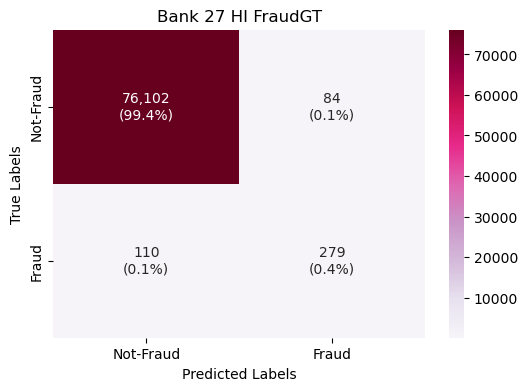

Precision: 0.77
Recall: 0.72
F1-Score: 0.74

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9986    0.9989    0.9987     76186
       Fraud     0.7686    0.7172    0.7420       389

    accuracy                         0.9975     76575
   macro avg     0.8836    0.8581    0.8704     76575
weighted avg     0.9974    0.9975    0.9974     76575



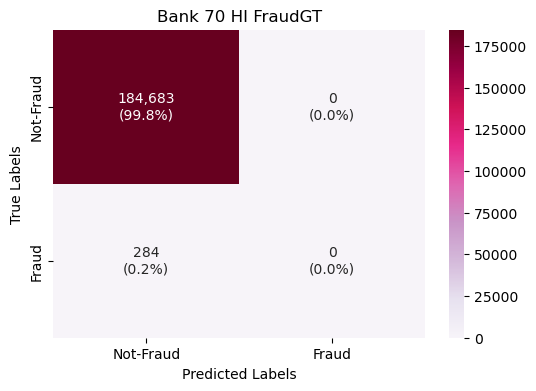

c:\Users\adagi\anaconda3\envs\rp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Classification Report:


c:\Users\adagi\anaconda3\envs\rp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adagi\anaconda3\envs\rp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   Not-Fraud     0.9985    1.0000    0.9992    184683
       Fraud     0.0000    0.0000    0.0000       284

    accuracy                         0.9985    184967
   macro avg     0.4992    0.5000    0.4996    184967
weighted avg     0.9969    0.9985    0.9977    184967



c:\Users\adagi\anaconda3\envs\rp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
for bank in [0,11,12,20,27,70]:
    confusion_matrix_plot(alldata_HI, bank=bank, title= f'Bank {bank} HI FraudGT', saveas = f'bank{bank}_HIFraudGT')
    #print(patterns_transactions(alldata_HI, patterns_HI,bank=bank, is_bank=True))

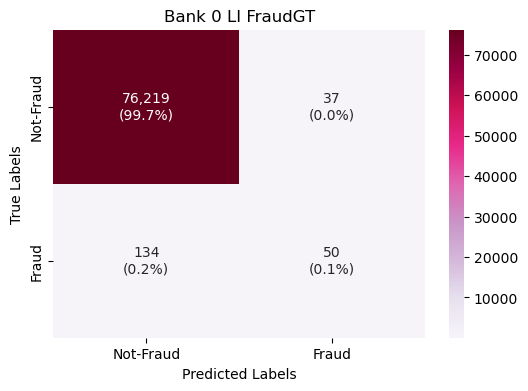

Precision: 0.57
Recall: 0.27
F1-Score: 0.37

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9982    0.9995    0.9989     76256
       Fraud     0.5747    0.2717    0.3690       184

    accuracy                         0.9978     76440
   macro avg     0.7865    0.6356    0.6839     76440
weighted avg     0.9972    0.9978    0.9974     76440



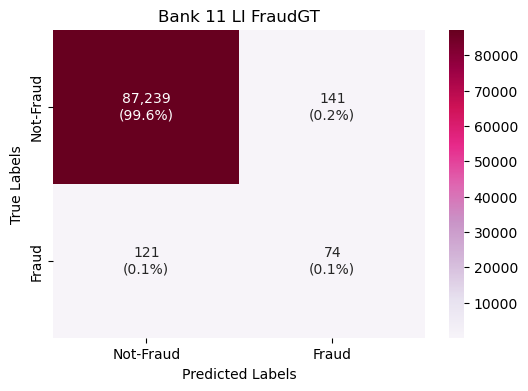

Precision: 0.34
Recall: 0.38
F1-Score: 0.36

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9986    0.9984    0.9985     87380
       Fraud     0.3442    0.3795    0.3610       195

    accuracy                         0.9970     87575
   macro avg     0.6714    0.6889    0.6797     87575
weighted avg     0.9972    0.9970    0.9971     87575



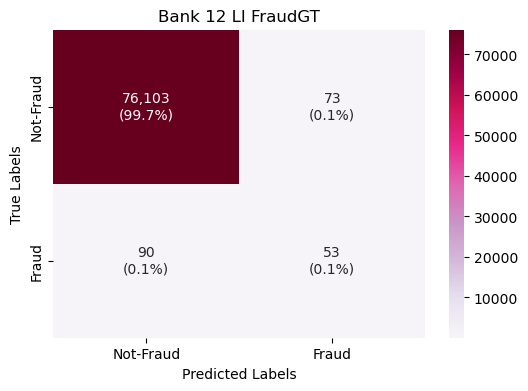

Precision: 0.42
Recall: 0.37
F1-Score: 0.39

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9988    0.9990    0.9989     76176
       Fraud     0.4206    0.3706    0.3941       143

    accuracy                         0.9979     76319
   macro avg     0.7097    0.6848    0.6965     76319
weighted avg     0.9977    0.9979    0.9978     76319



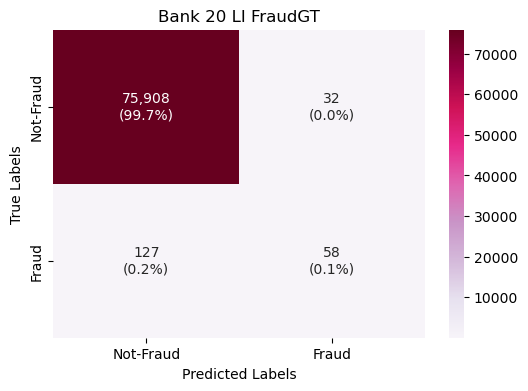

Precision: 0.64
Recall: 0.31
F1-Score: 0.42

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9983    0.9996    0.9990     75940
       Fraud     0.6444    0.3135    0.4218       185

    accuracy                         0.9979     76125
   macro avg     0.8214    0.6565    0.7104     76125
weighted avg     0.9975    0.9979    0.9976     76125



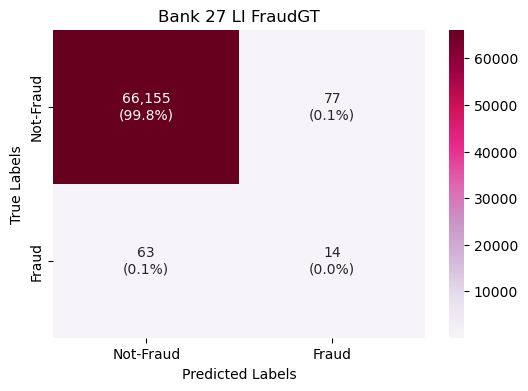

Precision: 0.15
Recall: 0.18
F1-Score: 0.17

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9990    0.9988    0.9989     66232
       Fraud     0.1538    0.1818    0.1667        77

    accuracy                         0.9979     66309
   macro avg     0.5764    0.5903    0.5828     66309
weighted avg     0.9981    0.9979    0.9980     66309



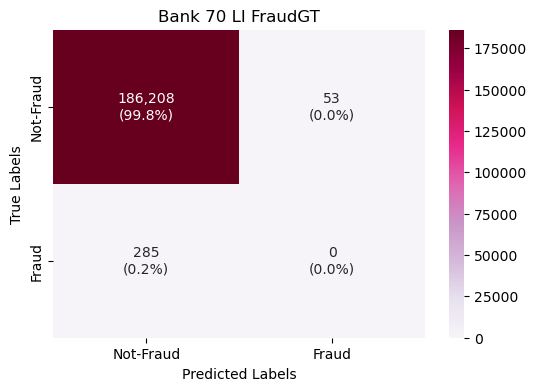

Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9985    0.9997    0.9991    186261
       Fraud     0.0000    0.0000    0.0000       285

    accuracy                         0.9982    186546
   macro avg     0.4992    0.4999    0.4995    186546
weighted avg     0.9969    0.9982    0.9976    186546



In [11]:
for bank in [0,11,12,20,27,70]:
    confusion_matrix_plot(alldata_LI, bank=bank, title= f'Bank {bank} LI FraudGT', saveas = f'bank{bank}_LIFraudGT')
  #  print(patterns_transactions(alldata_LI, patterns_LI,bank=bank, is_bank=True))

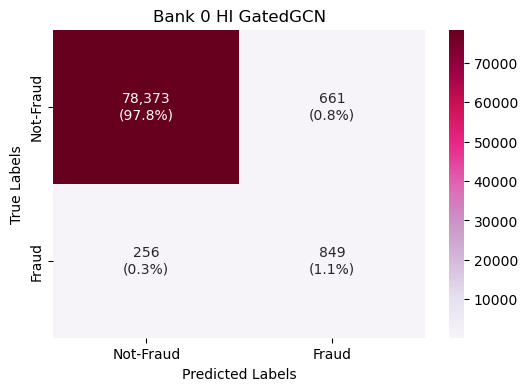

Precision: 0.56
Recall: 0.77
F1-Score: 0.65

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9967    0.9916    0.9942     79034
       Fraud     0.5623    0.7683    0.6493      1105

    accuracy                         0.9886     80139
   macro avg     0.7795    0.8800    0.8218     80139
weighted avg     0.9908    0.9886    0.9894     80139



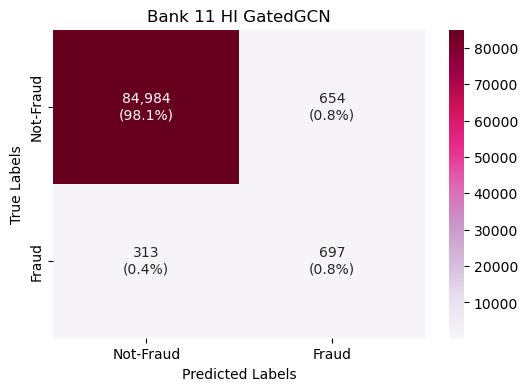

Precision: 0.52
Recall: 0.69
F1-Score: 0.59

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9963    0.9924    0.9943     85638
       Fraud     0.5159    0.6901    0.5904      1010

    accuracy                         0.9888     86648
   macro avg     0.7561    0.8412    0.7924     86648
weighted avg     0.9907    0.9888    0.9896     86648



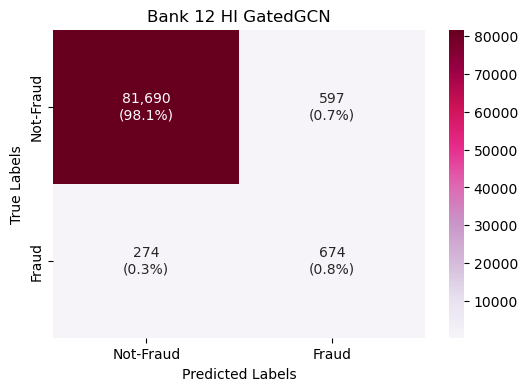

Precision: 0.53
Recall: 0.71
F1-Score: 0.61

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9967    0.9927    0.9947     82287
       Fraud     0.5303    0.7110    0.6075       948

    accuracy                         0.9895     83235
   macro avg     0.7635    0.8519    0.8011     83235
weighted avg     0.9913    0.9895    0.9903     83235



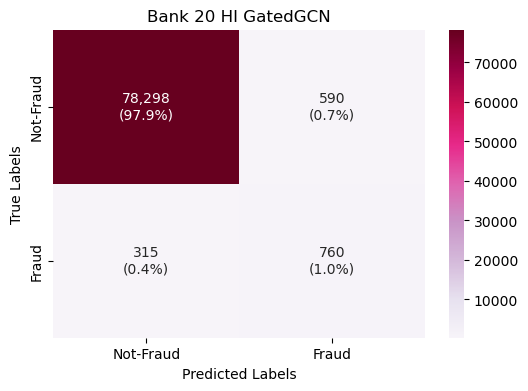

Precision: 0.56
Recall: 0.71
F1-Score: 0.63

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9960    0.9925    0.9943     78888
       Fraud     0.5630    0.7070    0.6268      1075

    accuracy                         0.9887     79963
   macro avg     0.7795    0.8497    0.8105     79963
weighted avg     0.9902    0.9887    0.9893     79963



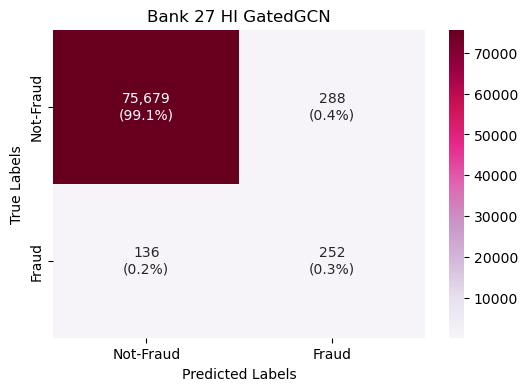

Precision: 0.47
Recall: 0.65
F1-Score: 0.54

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9982    0.9962    0.9972     75967
       Fraud     0.4667    0.6495    0.5431       388

    accuracy                         0.9944     76355
   macro avg     0.7324    0.8228    0.7702     76355
weighted avg     0.9955    0.9944    0.9949     76355



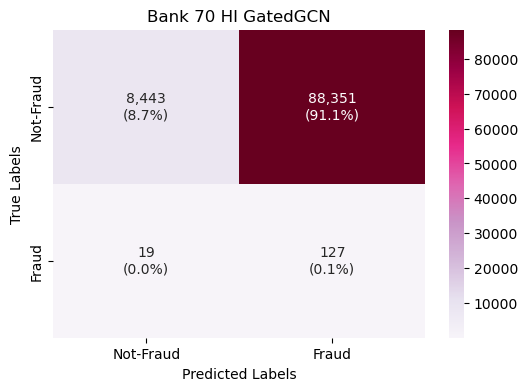

Precision: 0.00
Recall: 0.87
F1-Score: 0.00

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9978    0.0872    0.1604     96794
       Fraud     0.0014    0.8699    0.0029       146

    accuracy                         0.0884     96940
   macro avg     0.4996    0.4785    0.0816     96940
weighted avg     0.9963    0.0884    0.1602     96940



In [12]:
for bank in [0,11,12,20,27,70]:
    confusion_matrix_plot(alldata_GCN_HI, bank=bank, title= f'Bank {bank} HI GatedGCN', saveas = f'bank{bank}_HIGCN')
   # print(patterns_transactions(alldata_GCN_HI, patterns_HI,bank=bank, is_bank=True))

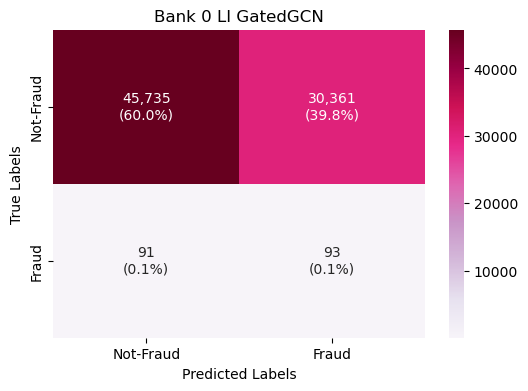

Precision: 0.00
Recall: 0.51
F1-Score: 0.01

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9980    0.6010    0.7502     76096
       Fraud     0.0031    0.5054    0.0061       184

    accuracy                         0.6008     76280
   macro avg     0.5005    0.5532    0.3782     76280
weighted avg     0.9956    0.6008    0.7484     76280



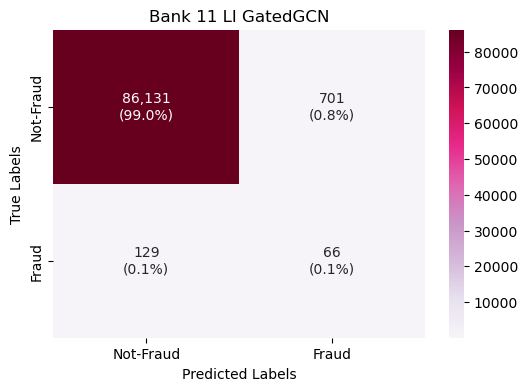

Precision: 0.09
Recall: 0.34
F1-Score: 0.14

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9985    0.9919    0.9952     86832
       Fraud     0.0860    0.3385    0.1372       195

    accuracy                         0.9905     87027
   macro avg     0.5423    0.6652    0.5662     87027
weighted avg     0.9965    0.9905    0.9933     87027



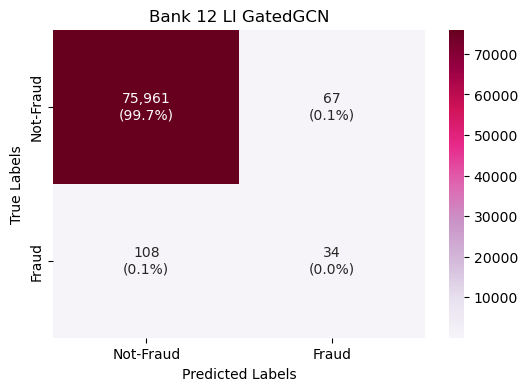

Precision: 0.34
Recall: 0.24
F1-Score: 0.28

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9986    0.9991    0.9988     76028
       Fraud     0.3366    0.2394    0.2798       142

    accuracy                         0.9977     76170
   macro avg     0.6676    0.6193    0.6393     76170
weighted avg     0.9973    0.9977    0.9975     76170



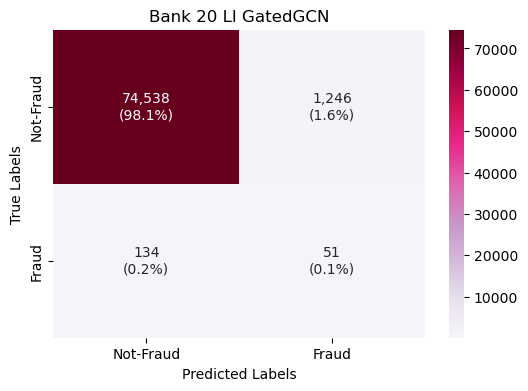

Precision: 0.04
Recall: 0.28
F1-Score: 0.07

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9982    0.9836    0.9908     75784
       Fraud     0.0393    0.2757    0.0688       185

    accuracy                         0.9818     75969
   macro avg     0.5188    0.6296    0.5298     75969
weighted avg     0.9959    0.9818    0.9886     75969



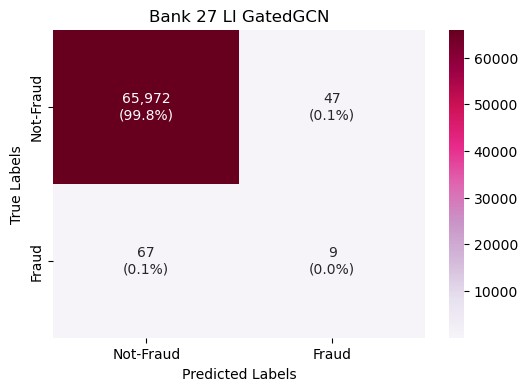

Precision: 0.16
Recall: 0.12
F1-Score: 0.14

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9990    0.9993    0.9991     66019
       Fraud     0.1607    0.1184    0.1364        76

    accuracy                         0.9983     66095
   macro avg     0.5798    0.5589    0.5678     66095
weighted avg     0.9980    0.9983    0.9981     66095



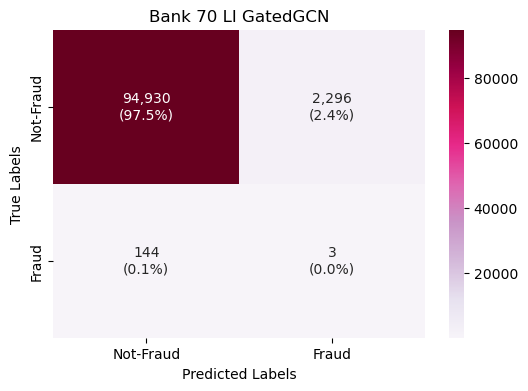

Precision: 0.00
Recall: 0.02
F1-Score: 0.00

Classification Report:
              precision    recall  f1-score   support

   Not-Fraud     0.9985    0.9764    0.9873     97226
       Fraud     0.0013    0.0204    0.0025       147

    accuracy                         0.9749     97373
   macro avg     0.4999    0.4984    0.4949     97373
weighted avg     0.9970    0.9749    0.9858     97373



In [13]:
for bank in [0,11,12,20,27,70]:
    confusion_matrix_plot(alldata_GCN_LI, bank=bank,title= f'Bank {bank} LI GatedGCN', saveas = f'bank{bank}_LIGCN')
 #   print(patterns_transactions(alldata_GCN_LI, patterns_LI,bank=bank, is_bank=True))

In [ ]:
small_hi_pred = pd.read_csv('predictions_small_HI.csv')
small_hi_pred['predicted_label'] = 1 / (1 + np.exp(-small_hi_pred['Prediction']))

In [ ]:
small_hi_pred
confusion_matrix_plot(small_hi_pred, 'small_hi', is_bank=False)

Load patterns

In [9]:
predictions = pd.read_csv('predictions_sm_HI.csv')

In [13]:
predictions[(predictions['Prediction_prob']<0.5)& (predictions['Prediction']==0)]

,Edge_ID,Prediction,Prediction_prob,True_Label
2830,4598765,0,0.498638,0
16336,5018224,0,0.498188,1
21964,5005967,0,0.493050,1
22071,5074328,0,0.498905,0
26159,5072007,0,0.499477,0
...,...,...,...,...
478969,5062489,0,0.498393,0
499619,4962215,0,0.493484,1
506572,5058534,0,0.499339,0
515186,4550072,0,0.489120,1


In [15]:
predictions_all_n = pd.read_csv('predictions_sm_HI_all_new.csv')
predictions_all_o = pd.read_csv('predictions_sm_HI_all.csv')

In [16]:
predictions_all_n

,Timestamp_x,From Bank,Account,To Bank,Account.1,Amount Received_x,Receiving Currency,Amount Paid,Payment Currency,Payment Format_x,...,Sent Currency,Amount Received_y,Received Currency,Payment Format_y,Is Laundering_y,Edge_ID,Prediction,Prediction_prob,True_Label,predicted_label
0,2022/09/09 04:58,135981,80F984C70,135981,80F984C70,1793.650000,Saudi Riyal,478.170000,US Dollar,ACH,...,0,1793.650000,13,3,0,812708.0,1,0.609165,0,1
1,2022/09/09 04:58,135981,80F984C70,48526,812411030,1793.650000,Saudi Riyal,1793.650000,Saudi Riyal,ACH,...,13,1793.650000,13,3,1,812709.0,1,0.570978,1,1
2,2022/09/09 10:54,19318,8106B1750,19318,8106B1750,1428.160000,US Dollar,9565.270000,Yuan,ACH,...,4,1428.160000,0,3,0,1191352.0,1,0.548284,0,1
3,2022/09/09 10:54,19318,8106B1750,11904,803197B30,1428.160000,US Dollar,1428.160000,US Dollar,ACH,...,0,1428.160000,0,3,1,1191353.0,1,0.529224,1,1
4,2022/09/09 17:14,19318,8106B1750,18196,807FDA6D0,35570.710000,Yuan,35570.710000,Yuan,ACH,...,4,35570.710000,4,3,1,1191354.0,1,0.545526,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519556,2022/09/10 23:31,255063,8141462F1,256496,81486D3D1,0.003732,Bitcoin,0.003732,Bitcoin,Bitcoin,...,1,0.003732,1,6,0,5078336.0,1,0.522493,0,1
519557,2022/09/10 23:43,15,8136C5291,126,81489D161,0.002624,Bitcoin,0.002624,Bitcoin,Bitcoin,...,1,0.002624,1,6,0,5078338.0,1,0.521902,0,1
519558,2022/09/10 23:34,15,8136C5291,126,81489D161,0.003010,Bitcoin,0.003010,Bitcoin,Bitcoin,...,1,0.003010,1,6,0,5078339.0,1,0.522062,0,1
519559,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,...,1,0.004988,1,6,0,5078342.0,1,0.503792,0,1


In [18]:
together = predictions_all_n.merge(predictions_all_o, left_on='EdgeID', right_on='Edge_ID')

In [20]:
together.columns

Index(['Timestamp_x_x', 'From Bank_x', 'Account_x', 'To Bank_x', 'Account.1_x',
       'Amount Received_x_x', 'Receiving Currency_x', 'Amount Paid_x',
       'Payment Currency_x', 'Payment Format_x_x', 'Is Laundering_x_x',
       'EdgeID_x', 'from_id_x', 'to_id_x', 'Timestamp_y_x', 'Amount Sent_x',
       'Sent Currency_x', 'Amount Received_y_x', 'Received Currency_x',
       'Payment Format_y_x', 'Is Laundering_y_x', 'Edge_ID_x', 'Prediction_x',
       'Prediction_prob', 'True_Label_x', 'predicted_label_x', 'Timestamp_x_y',
       'From Bank_y', 'Account_y', 'To Bank_y', 'Account.1_y',
       'Amount Received_x_y', 'Receiving Currency_y', 'Amount Paid_y',
       'Payment Currency_y', 'Payment Format_x_y', 'Is Laundering_x_y',
       'EdgeID_y', 'from_id_y', 'to_id_y', 'Timestamp_y_y', 'Amount Sent_y',
       'Sent Currency_y', 'Amount Received_y_y', 'Received Currency_y',
       'Payment Format_y_y', 'Is Laundering_y_y', 'Edge_ID_y', 'Prediction_y',
       'True_Label_y', 'predicted_l

In [ ]:

y_pred_prob = list(together['predicted_label_y'])
together['predicted_binary'] =  [1 if prob >= 0.5 else 0 for prob in y_pred_prob]



0         1
1         1
2         1
3         1
4         1
         ..
519556    1
519557    1
519558    1
519559    1
519560    1
Name: predicted_binary, Length: 519561, dtype: int64

In [29]:
together[together['predicted_label_x']!= together['predicted_binary']]

,Timestamp_x_x,From Bank_x,Account_x,To Bank_x,Account.1_x,Amount Received_x_x,Receiving Currency_x,Amount Paid_x,Payment Currency_x,Payment Format_x_x,...,Sent Currency_y,Amount Received_y_y,Received Currency_y,Payment Format_y_y,Is Laundering_y_y,Edge_ID_y,Prediction_y,True_Label_y,predicted_label_y,predicted_binary


0         1
1         1
2         1
3         1
4         1
         ..
519556    1
519557    1
519558    1
519559    1
519560    1
Name: predicted_label_x, Length: 519561, dtype: int64